In [1]:
# Goal is that ki age and fare in missing value ne fill karvani che .
# numerical imputation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("titanic_toy")

In [27]:
df.shape

(891, 4)

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.sample(5)

,Age,Fare,Family,Survived
724,27.0,53.1000,1,1
88,23.0,263.0000,5,1
250,NaN,7.2500,0,0
380,42.0,227.5250,0,1
370,25.0,55.4417,1,1


In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [8]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [10]:
x_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [11]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].mean()

mean_Fare = x_train['Fare'].mean()
median_Fare = x_train['Fare'].mean()

In [12]:
print(mean_age) , print(median_age) , print(mean_Fare) , print(median_Fare)

29.498846153846156
29.498846153846156
32.51778772189349
32.51778772189349


(None, None, None, None)

In [13]:
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['age_median'] = x_train['Age'].fillna(median_age)

x_train['fare_mean'] = x_train['Fare'].fillna(mean_Fare)
x_train['fare_median'] = x_train['Fare'].fillna(median_Fare)

In [14]:
x_train.sample(5)

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
676,24.5,8.0500,0,24.500000,24.500000,8.0500,8.0500
335,NaN,7.8958,0,29.498846,29.498846,7.8958,7.8958
108,38.0,7.8958,0,38.000000,38.000000,7.8958,7.8958
371,18.0,6.4958,1,18.000000,18.000000,6.4958,6.4958
864,24.0,13.0000,0,24.000000,24.000000,13.0000,13.0000


In [15]:
print("original age variable variance:", x_train['Age'].var())
print("Age Variance after median imputation",x_train['age_median'].var())
print("Age variance agter mean imputation",x_train['age_mean'].var())

original age variable variance: 210.2517072477435
Age Variance after median imputation 168.85193366872227
Age variance agter mean imputation 168.85193366872227


In [16]:
print("original fare variable variance:",x_train['Fare'].var())
print("fare variance after median imputatuion",x_train['fare_median'].var())
print("fare variance after mean imputatuion",x_train['fare_mean'].var())

original fare variable variance: 2761.0314349486343
fare variance after median imputatuion 2621.232374951235
fare variance after mean imputatuion 2621.232374951235


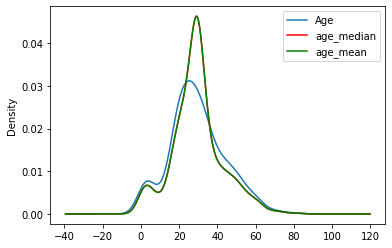

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution 
x_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with the median.
x_train['age_median'].plot(kind='kde',ax=ax,color='red')

#variable imputed with mean.
x_train['age_mean'].plot(kind='kde',ax=ax,color='green')

#legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

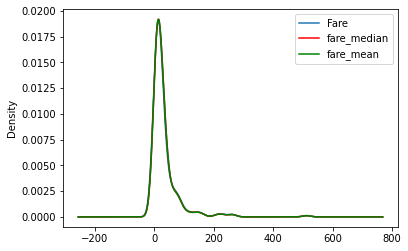

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution 
x_train['Fare'].plot(kind='kde',ax=ax)

#variable imputed with the median.
x_train['fare_median'].plot(kind='kde',ax=ax,color='red')

#variable imputed with mean.
x_train['fare_mean'].plot(kind='kde',ax=ax,color='green')

#legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [20]:
x_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,71.193767
Fare,75.481375,2761.031435,18.599163,60.224654,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.616299,17.657433,17.657433
age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,57.175304
age_median,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,57.175304
fare_mean,71.193767,2761.031435,17.657433,57.175304,57.175304,2621.232375,2621.232375
fare_median,71.193767,2761.031435,17.657433,57.175304,57.175304,2621.232375,2621.232375


In [22]:
x_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.088944
Fare,0.091482,1.000000,0.207193,0.088151,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.256883,0.204981,0.204981
age_mean,1.000000,0.088151,-0.256883,1.000000,1.000000,0.085941,0.085941
age_median,1.000000,0.088151,-0.256883,1.000000,1.000000,0.085941,0.085941
fare_mean,0.088944,1.000000,0.204981,0.085941,0.085941,1.000000,1.000000
fare_median,0.088944,1.000000,0.204981,0.085941,0.085941,1.000000,1.000000


<AxesSubplot:>

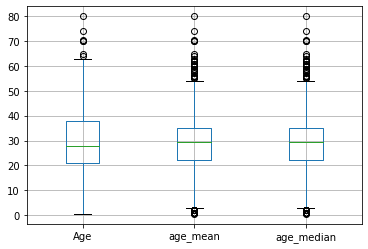

In [25]:
x_train[['Age','age_mean','age_median']].boxplot()

<AxesSubplot:>

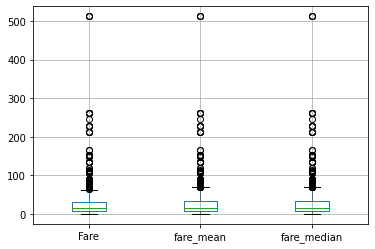

In [26]:
x_train[['Fare','fare_mean','fare_median']].boxplot()

# using sklearn 

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [32]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [33]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [34]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [35]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [36]:
x_train = trf.transform(x_train)
x_test  = trf.transform(x_test)

In [37]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [38]:
#THE END. 